In this Project, we are going to perform a full unsupervised learning machine learning project

In [229]:
#Libraries to work with dataframe
# import pandas
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns



In [230]:
# load data
df = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\e-commerce\Transforming_e-commerce_transactions\Data_files\SalesTransaction.csv', sep = ",")

In [231]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [232]:
df.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12/1/2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [234]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [235]:
df.shape

(536350, 8)

In [236]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


Data cleaning

In [237]:
# to change date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [238]:
df.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
dtype: object

In [239]:
# check for null values
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

55 customersNo is null so we will drop the rows

In [240]:
# drop null customerNo
df[df['CustomerNo'].isnull()]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,2019-10-04,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,2019-09-20,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,2019-09-20,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,2019-08-11,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,2019-08-11,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


In [241]:
# drop Nan
df.dropna(inplace=True)
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [242]:
# check for duplicates
num_duplicates = df.duplicated().sum()
num_duplicates

5200

In [243]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


Identify the sales trends over the months.

In [246]:
df['Total_sales_amount'] = df['Quantity'] * df['Price']
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_sales_amount,Month_Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019-12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019-12


In [248]:
month_total = df.groupby(['Month_Year'], as_index=False)['Total_sales_amount'].sum()
month_total.columns = ['Date', 'Total_sales_amount']
month_total.head()

,Date,Total_sales_amount
0,2018-12,4217281.53
1,2019-01,3638948.12
2,2019-02,3292324.69
3,2019-03,4340035.60
4,2019-04,3406002.17


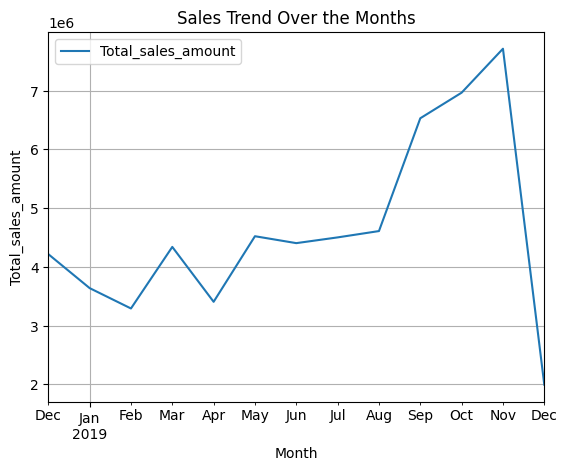

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the data using Pandas DataFrame's plot method
month_total.plot(x='Date', y='Total_sales_amount', kind='line', title='Sales Trend Over the Months')
plt.xlabel('Month') 
plt.ylabel('Total_sales_amount') 
plt.grid(True) 


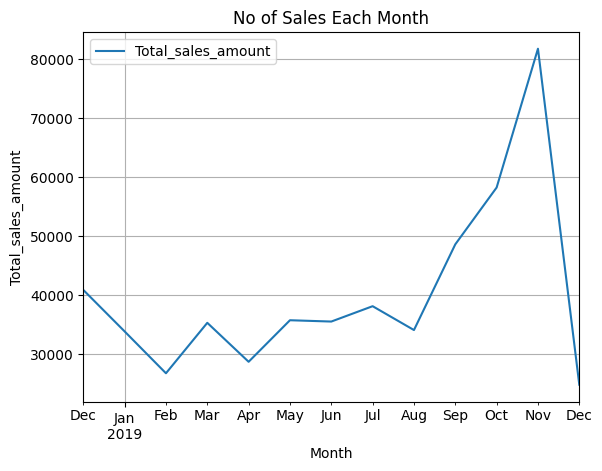

In [250]:
df_return_no = df[df['Quantity'] > 0]
no_of_sales = df_return_no.groupby(by='Month_Year', as_index=False)['Total_sales_amount'].count()
no_of_sales.columns = ['Date', 'Total_sales_amount']     
no_of_sales.plot(x='Date', y='Total_sales_amount', kind='line', title='No of Sales Each Month')
plt.xlabel('Month')  
plt.ylabel('Total_sales_amount')  
plt.grid(True)  
plt.show()


Identify 15 most frequently purchased products

In [251]:
purchased_products = df.groupby(by='ProductName', as_index = False)['Quantity'].sum()
#purchased_products.sort_values('Quantity', ascending = False).head(15).iplot(kind = 'bar', x = 'ProductName', y = 'Quantity', title = '15 Most Frequently Purchased Products')

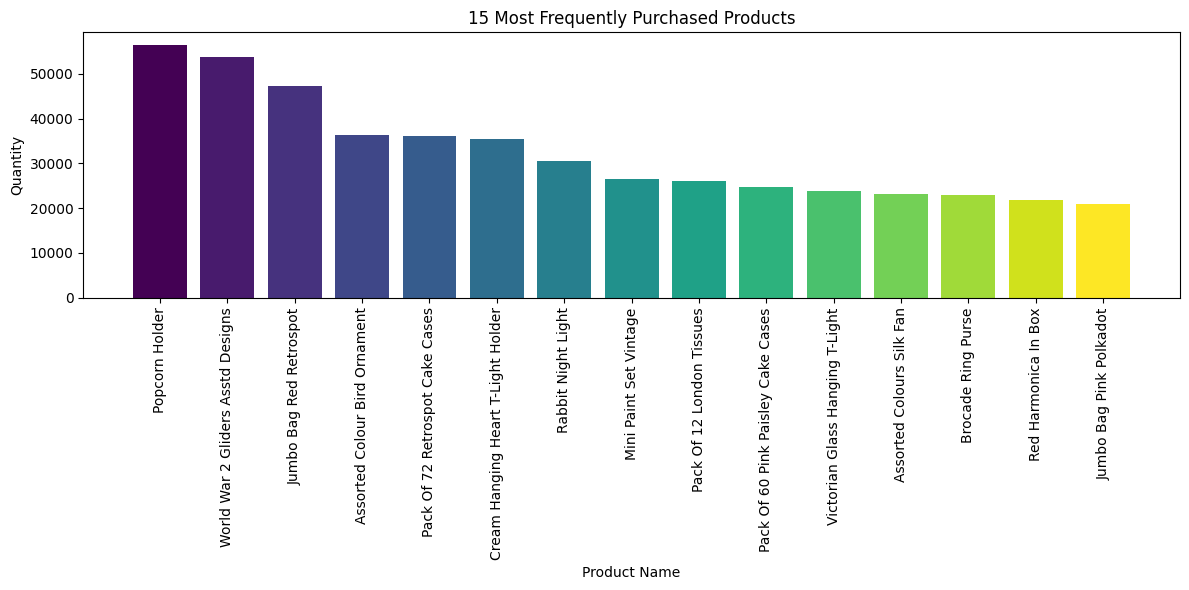

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'Quantity' in descending order and select the top 15
top_15_products = purchased_products.sort_values('Quantity', ascending=False).head(15)

# Generate a color palette with different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_products)))

# Create the bar plot with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
bars = plt.bar(top_15_products['ProductName'], top_15_products['Quantity'], color=colors)
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('15 Most Frequently Purchased Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()


products  purchased in each transaction by the customer ?

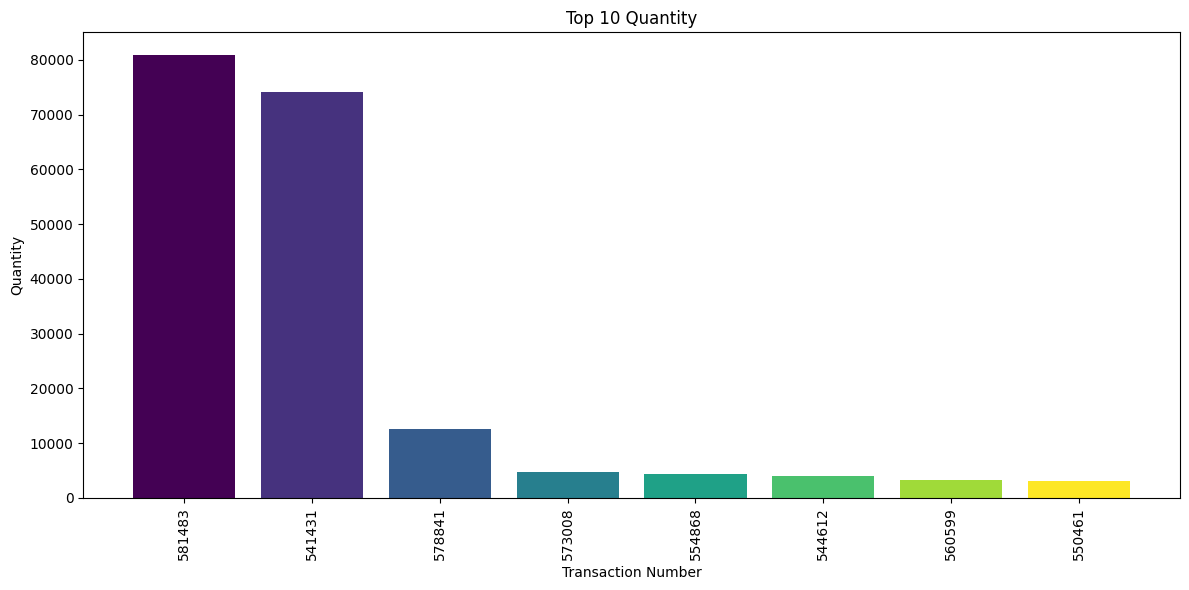

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#a DataFrame 'top_product_quantity' with 'Quantity' and 'TransactionNo' columns
top_product_quantity = df.sort_values('Quantity', ascending=False)[['Quantity', 'TransactionNo']].head(8).reset_index(drop=True)

# Generate x and y data for the bar chart
x_values = top_product_quantity['TransactionNo']
y_values = top_product_quantity['Quantity']

# Create the bar chart with different colors
plt.figure(figsize=(12, 6)) 
plt.bar(x_values, y_values, color=plt.cm.viridis(np.linspace(0, 1, len(x_values))))
plt.xlabel('Transaction Number')
plt.ylabel('Quantity')
plt.title('Top 10 Quantity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()


First 10 countries with the highest profit and least profit.

In [254]:
profitable_countries = df.groupby(by='Country', as_index = False)['Total_sales_amount'].sum().sort_values('Total_sales_amount', ascending = False).head(10)

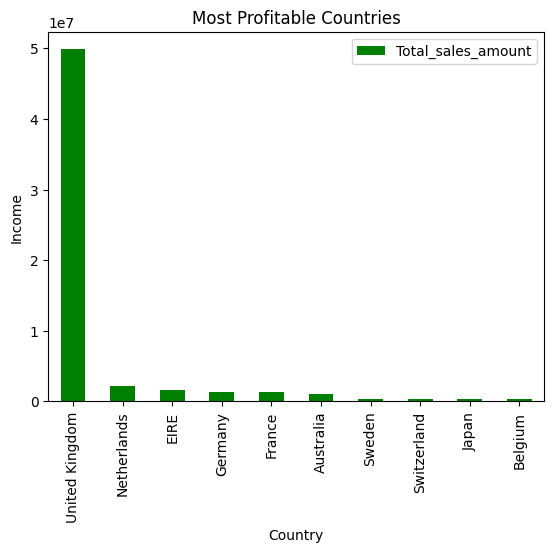

In [255]:
profitable_countries.plot(kind='bar', x='Country', y='Total_sales_amount', title='Most Profitable Countries', color='green')

# Set the y-axis label
plt.ylabel('Income')

# Show the plot
plt.show()


First 10 countries with the least profit.

In [256]:

least_profitable_countries = df.groupby(by='Country', as_index = False)['Total_sales_amount'].sum().sort_values('Total_sales_amount').head(10)

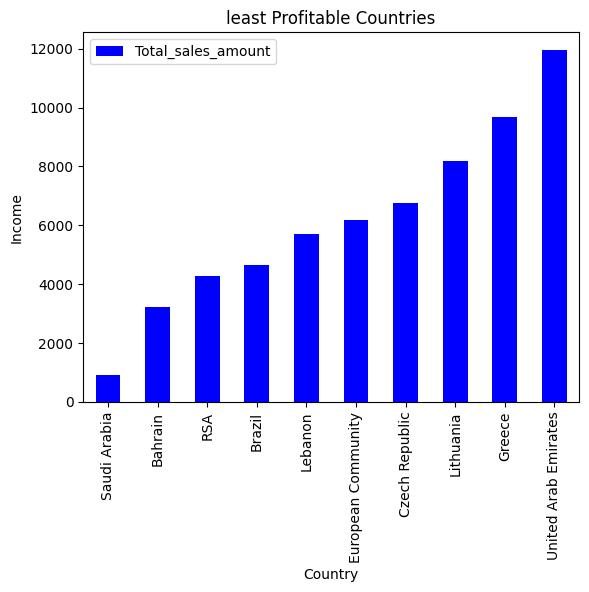

In [257]:
least_profitable_countries.plot(kind='bar', x='Country', y='Total_sales_amount', title='least Profitable Countries', color='blue')

# Set the y-axis label
plt.ylabel('Income')

# Show the plot
plt.show()


5 most profitable customers

In [258]:
 Most_Profitable_Customers = df.groupby(by='CustomerNo', as_index = False)['Total_sales_amount'].sum().sort_values('Total_sales_amount', ascending = False).head(5)

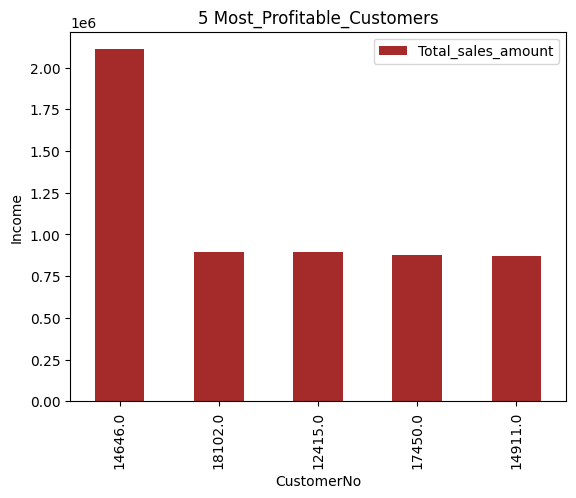

In [259]:
Most_Profitable_Customers.plot(kind='bar', x='CustomerNo', y='Total_sales_amount', title='5 Most_Profitable_Customers', color='brown')

# Set the y-axis label
plt.ylabel('Income')

# Show the plot
plt.show()
